<a href="https://colab.research.google.com/github/AkashK18/Credit-Card-Default-Prediction-ML-Classification/blob/main/Credit_Card_Default_Prediction_ML_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Predicting whether a customer will default on his/her credit card**

**Problem Description**

This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments

**Data Description**

**Attribute Information:**

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:


*   X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.List item

*   X2: Gender (1 = male; 2 = female).

*   X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

*   X4: Marital status (1 = married; 2 = single; 3 = others).
*   X5: Age (year).


*   X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.


*   X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.


*   X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.



# Initializing

In [7]:
# importing required libraries for data analysis
import pandas as pd
import numpy as np
from numpy import math

# impoerting libraries for dat visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = pd.read_csv('/content/drive/MyDrive/almabetter/Capstone project 3 Credit Card/default of credit card clients.xls - Data.csv')

In [10]:
# Take a first of dataset
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Data Cleaning

In [11]:
#shape of data
df.shape

(30000, 25)

In [12]:
#basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [13]:
#summary of dataset
df.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [14]:
#check for na values in dataset
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [15]:
#check for null values in dataset
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [16]:
#check for any duplicates
len(df[df.duplicated()])

0



*   Dataset dose not contains any NA values, null values and duplicates.



# Data Description

In [17]:
#columns of dataset
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [18]:
#shape of dataset
df.shape

(30000, 25)


 This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following variables as explanatory variables:


*   ID: Unique ID of each client

*   LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

*   Gender: 1 = male; 2 = female
*   Education: 1 = graduate school; 2 = university; 3 = high school; 4 = others


*   Marital status: 1 = married; 2 = single; 3 = others).


*   Age: Age in years







**History of past payment.**

We tracked the past monthly payment records from April to September, 2005.The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.


*   PAY_0: Repayment status in September, 2005

*   PAY_2: Repayment status in August, 2005

*   PAY_3: Repayment status in July, 2005

*   PAY_4: Repayment status in June, 2005


*   PAY_5: Repayment status in May, 2005


*   PAY_6: Repayment status in April, 2005



**Amount of bill statement (NT dollar).**


*   BILL_AMT1: Amount of bill statement in September, 2005

*   BILL_AMT2: Amount of bill statement in August, 2005

*   BILL_AMT3: Amount of bill statement in July, 2005

*   BILL_AMT4: Amount of bill statement in June, 2005


*   BILL_AMT5: Amount of bill statement in May, 2005


*   BILL_AMT6: Amount of bill statement in April, 2005




**Amount of previous payment (NT dollar).** 



*   PAY_AMT1: Amount of previous payment in September, 2005
*   PAY_AMT2: Amount of previous payment in August, 2005


*   PAY_AMT3: Amount of previous payment in July, 2005

*   PAY_AMT4: Amount of previous payment in June, 2005
*   PAY_AMT5: Amount of previous payment in May, 2005


*   PAY_AMT6: Amount of previous payment in April, 2005


*   default.payment.next.month: Default payment (1=yes, 0=no)







# Data Preprocessing

Changing name of some columns for simplicity and better understanding

In [19]:
#renaming of columns
df.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [20]:
#check for columns name
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [21]:
#replacing values with there labels
df.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
df.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace=True)
df.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
df.replace({'IsDefaulter' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

In [22]:
#check for replaced labels
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Yes
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No


# Exploratory Data Analysis

IsDefaulter

<AxesSubplot:xlabel='IsDefaulter', ylabel='count'>

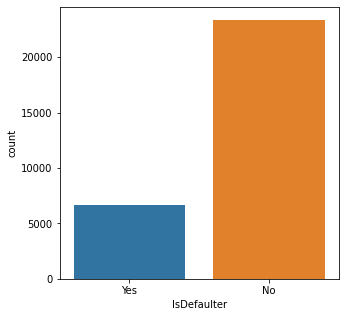

In [23]:
#values count plot of IsDefaulter
plt.figure(figsize=(5,5))
sns.countplot(x = 'IsDefaulter', data = df)



*   Both classes are not in proportion that is we have imbalanced dataset.



<AxesSubplot:xlabel='SEX', ylabel='count'>

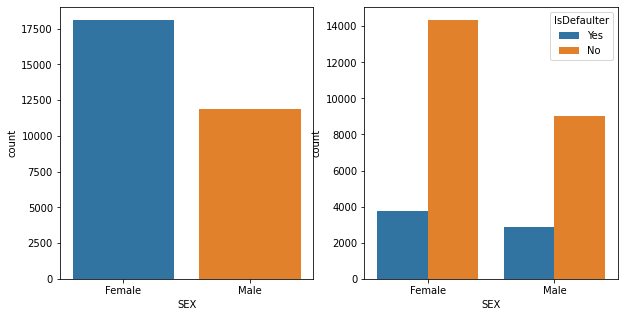

In [24]:
#count plot for sex and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
sns.countplot(x = 'SEX', ax = axes[0], data = df)
sns.countplot(x = 'SEX', hue = 'IsDefaulter', ax = axes[1], data = df)

**EDUCATION**

In [25]:
#category wise values
df['EDUCATION'].value_counts()

University         14030
Graduate School    10585
High School         4917
5                    280
Others               123
6                     51
0                     14
Name: EDUCATION, dtype: int64



*   In education column, values such as 5,6 and 0 are unknown. Lets combine those values as others.



In [26]:
#replace values with 5, 6 and 0 to others
df.EDUCATION = df.EDUCATION.replace({5: "Others", 6: "Others", 0: "Others"})

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

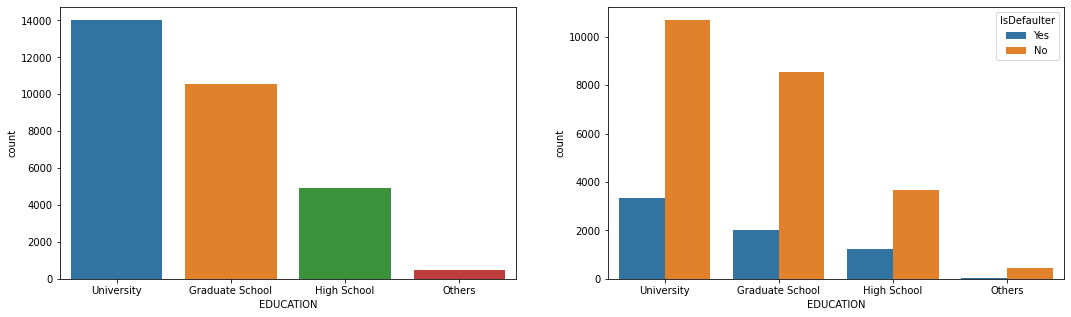

In [27]:
#count plot for EDUCATION and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2, figsize=(18,5))
sns.countplot(x = 'EDUCATION', ax = axes[0], data = df)
sns.countplot(x = 'EDUCATION', hue = 'IsDefaulter', ax = axes[1], data = df)

**MARRIAGE**

In [28]:
#Category wise values
df['MARRIAGE'].value_counts()

Single     15964
Married    13659
Others       323
0             54
Name: MARRIAGE, dtype: int64



*   In marriage column, 0 values are not known. Combine those values in others category.



In [29]:
#replace 0 with others
df.MARRIAGE = df.MARRIAGE.replace({0: "Others"})

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

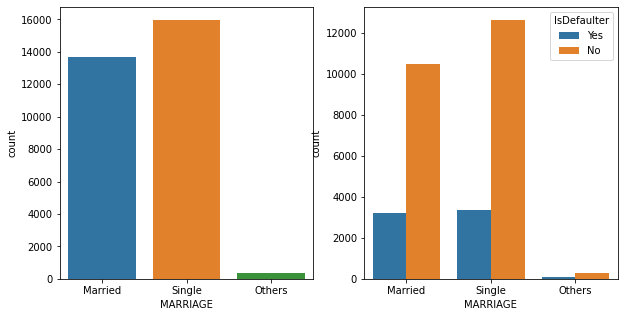

In [30]:
#count plot for MARRIAGE and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
sns.countplot(x = 'MARRIAGE', ax = axes[0], data = df)
sns.countplot(x = 'MARRIAGE', hue = 'IsDefaulter', ax = axes[1], data = df)

**AGE**

In [31]:
#age wise values of credit card holder
df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

<AxesSubplot:xlabel='AGE', ylabel='count'>

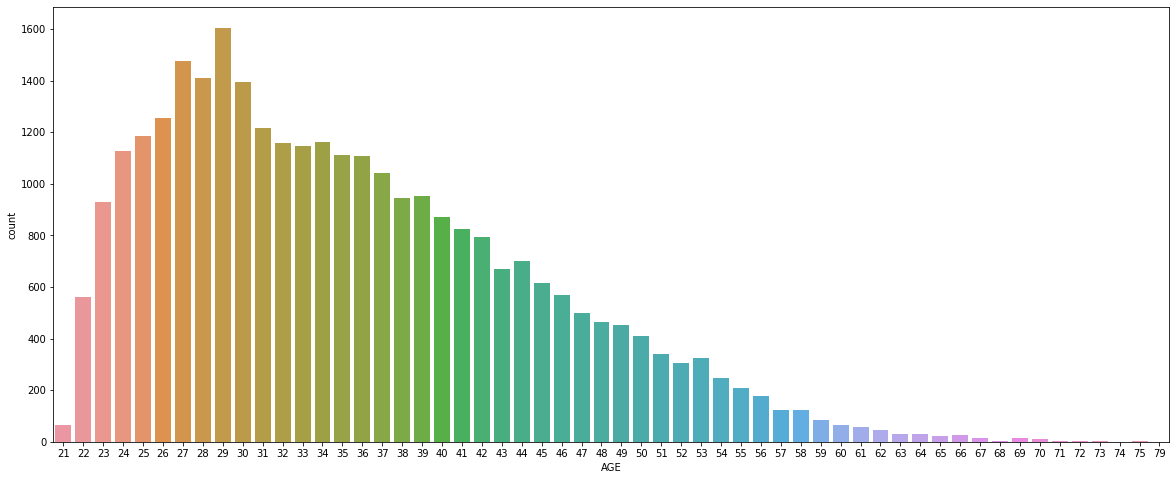

In [32]:
#values count for AGE
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', data = df)

<AxesSubplot:xlabel='AGE', ylabel='count'>

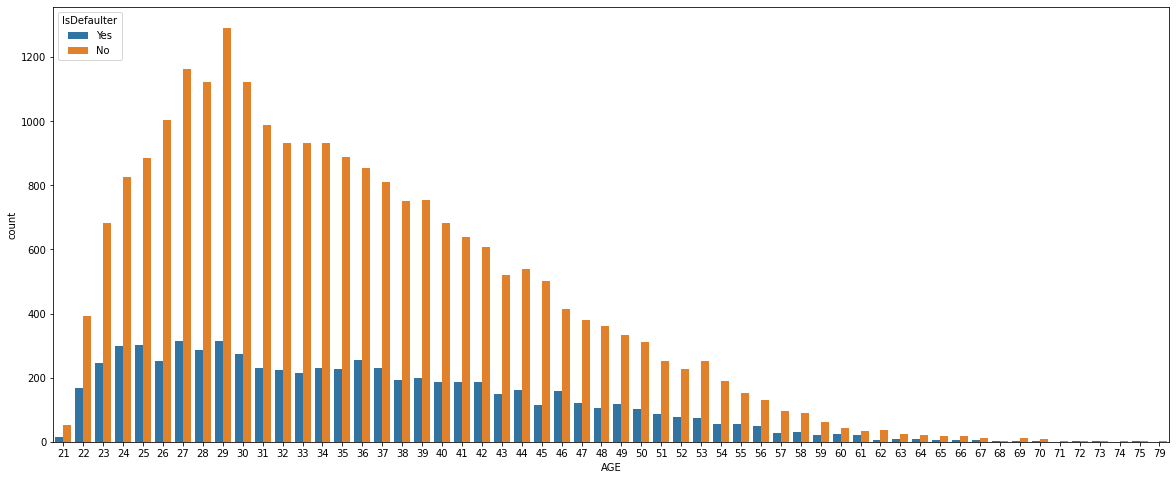

In [33]:
#values count for age with respect to IsDefaulter
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', hue = 'IsDefaulter', data = df)

***Label Encoding***

In [34]:
#label encoding
encoders_nums = {"SEX":{"Female":0, "Male":1}, "IsDefaulter": {"Yes":1, "No":0}}

df = df.replace(encoders_nums)

In [35]:
#check for changed labels
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,0,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,0,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,0,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,0,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**One Hot Encoding**

In [36]:
#Creating dummy variables
df = pd.get_dummies(df, columns = ['EDUCATION', 'MARRIAGE'])

In [37]:
df.shape

(30000, 30)

In [38]:
df.drop(['EDUCATION_Others', 'MARRIAGE_Others'], axis=1, inplace=True)

In [39]:
df.shape

(30000, 28)

In [40]:
#creating dummy variables by droping first variable
df = pd.get_dummies(df, columns =['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR'], drop_first = True )

In [41]:
df.shape

(30000, 80)

In [42]:
#check for all the created variables
df.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,0,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,0,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,0,34,29239,14027,13559,14331,14948,15549,...,0,0,1,0,0,0,0,0,0,0
3,4,50000,0,37,46990,48233,49291,28314,28959,29547,...,0,0,1,0,0,0,0,0,0,0
4,5,50000,1,57,8617,5670,35835,20940,19146,19131,...,0,0,1,0,0,0,0,0,0,0


In [43]:
#shape of dataset after creating dummy variables
df.shape

(30000, 80)

# Handling Class Imbalance

SMOTE - Synthetic Minority Oversampling Technique

In [44]:
#importing SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df[(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter')], df['IsDefaulter'])

print('Original unbalanced dataset shape', len(df))
print('Resampled balanced dataset shape', len(y_smote))



Original unbalanced dataset shape 30000
Resampled balanced dataset shape 46728


In [45]:
#creating new dataframe from balanced dataset after SMOTE
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter'))

In [46]:
#adding target variable to new created dataframe
balanced_df['IsDefaulter'] = y_smote

<AxesSubplot:xlabel='IsDefaulter', ylabel='count'>

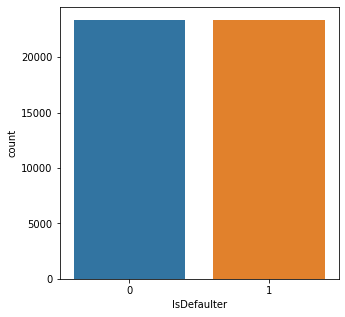

In [47]:
#check for class imbalance
plt.figure(figsize=(5,5))
sns.countplot('IsDefaulter', data = balanced_df)

In [48]:
#shape of balanced dataframe
balanced_df.shape

(46728, 80)

In [49]:
#removing feature ID from dataset
balanced_df.drop('ID', axis = 1, inplace = True)

In [50]:
#final dataset
balanced_df.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8,IsDefaulter
0,20000,0,24,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,...,0,0,1,0,0,0,0,0,0,1
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,...,0,1,0,0,0,0,0,0,0,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,...,0,1,0,0,0,0,0,0,0,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,...,0,1,0,0,0,0,0,0,0,0


In [51]:
#To display upto 200 columns and rows at once
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [52]:
#correlation amoung all the features
balanced_df.corr()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,EDUCATION_Graduate School,EDUCATION_High School,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Single,PAY_SEPT_-1,PAY_SEPT_0,PAY_SEPT_1,PAY_SEPT_2,PAY_SEPT_3,PAY_SEPT_4,PAY_SEPT_5,PAY_SEPT_6,PAY_SEPT_7,PAY_SEPT_8,PAY_AUG_-1,PAY_AUG_0,PAY_AUG_1,PAY_AUG_2,PAY_AUG_3,PAY_AUG_4,PAY_AUG_5,PAY_AUG_6,PAY_AUG_7,PAY_AUG_8,PAY_JUL_-1,PAY_JUL_0,PAY_JUL_1,PAY_JUL_2,PAY_JUL_3,PAY_JUL_4,PAY_JUL_5,PAY_JUL_6,PAY_JUL_7,PAY_JUL_8,PAY_JUN_-1,PAY_JUN_0,PAY_JUN_1,PAY_JUN_2,PAY_JUN_3,PAY_JUN_4,PAY_JUN_5,PAY_JUN_6,PAY_JUN_7,PAY_JUN_8,PAY_MAY_-1,PAY_MAY_0,PAY_MAY_2,PAY_MAY_3,PAY_MAY_4,PAY_MAY_5,PAY_MAY_6,PAY_MAY_7,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8,IsDefaulter
LIMIT_BAL,1.000000,-0.001330,0.160141,0.311656,0.303525,0.304800,0.310019,0.311323,0.305289,0.197601,0.183983,0.209241,0.206821,0.219590,0.223991,0.290359,-0.098245,-0.119864,0.135683,-0.051224,0.152982,-0.020936,-0.015779,-0.114334,-0.054343,-0.025437,-0.015931,-0.008498,-0.000938,-0.008079,0.175301,-0.057094,0.006862,-0.165335,-0.050560,-0.033560,-0.014231,-0.003065,-0.008895,-0.004196,0.179070,-0.069417,0.011476,-0.153167,-0.052128,-0.026260,-0.004056,-0.013607,-0.022767,-0.007268,0.161852,-0.067150,1.149680e-02,-0.145477,-0.043781,-0.023826,-0.014234,-0.008725,-0.041464,-5.934320e-03,0.151273,-0.068074,-0.132597,-0.046121,-0.028215,-0.009361,-0.003793,-0.042291,-0.004564,0.151815,-0.062240,-0.134771,-0.042236,-0.026217,-0.006950,-0.010780,-0.036966,-0.004633,-1.912837e-01
SEX,-0.001330,1.000000,0.083585,0.028760,0.025597,0.018156,0.013658,0.010714,0.009729,0.019847,0.015918,0.017736,0.014311,0.012052,0.016381,0.068275,0.044638,0.024208,0.015570,0.083983,0.015802,0.100623,0.032284,-0.005473,0.034974,0.021411,0.017489,0.004832,0.006805,0.008630,0.007514,0.093155,0.009102,0.017705,0.027639,0.025748,0.009888,0.008808,0.009900,-0.003216,0.011017,0.081446,0.013311,0.020206,0.030490,0.018235,0.006805,0.006835,0.004635,0.011527,0.006661,0.075701,9.411857e-03,0.018949,0.031416,0.021179,0.009003,0.001638,0.016195,9.411857e-03,0.009044,0.073124,0.015800,0.027752,0.021082,0.005895,0.013311,0.016195,0.006655,0.008540,0.063358,0.012605,0.024372,0.014562,0.009074,0.013160,0.013619,0.009412,-1.281748e-01
AGE,0.160141,0.083585,1.000000,0.057825,0.055207,0.054258,0.051543,0.050291,0.049313,0.030576,0.024301,0.025519,0.020197,0.022344,0.023185,-0.069036,0.202569,-0.076607,0.409351,-0.412012,0.031052,-0.038616,0.001724,-0.000671,-0.002756,-0.000739,0.000430,-0.000172,0.006036,0.001380,0.042469,-0.050879,-0.001110,-0.008901,-0.009418,0.004098,-0.002204,0.002767,0.003769,-0.005997,0.036740,-0.048102,-0.000419,-0.011749,-0.001576,-0.008207,0.001910,-0.000140,0.000421,0.002067,0.039598,-0.054696,1.191640e-03,-0.001276,0.001294,-0.006559,0.001610,-0.010587,-0.001791,8.196070e-04,0.034238,-0.050034,-0.016675,0.007778,-0.003272,-0.002141,-0.006207,-0.001688,0.006104,0.040248,-0.041486,-0.015987,-0.010651,-0.005432,0.000200,-0.003208,0.006408,0.002308,-2.136945e-03
BILL_AMT_SEPT,0.311656,0.028760,0.057825,1.000000,0.964201,0.913548,0.881263,0.851630,0.827455,0.167166,0.117680,0.176948,0.179807,0.199527,0.205253,-0.021043,-0.019372,0.029591,0.036266,-0.014368,-0.225071,0.291210,-0.109775,0.064523,-0.021595,0.008966,0.009123,0.006631,0.019694,0.017325,-0.244907,0.323709,0.005284,0.007708,-0.004661,0.002819,0.008263,0.018739,0.016612,-0.001532,-0.231339,0.344064,0.007943,-0.009281,-0.010329,0.005173,0.011133,0.011936,-0.018133,-0.003910,-0.206173,0.338203,1.327498e-02,-0.006136,-0.005160,-0.001039,0.005539,-0.003000,-0.028911,-2.210483e-03,-0.196045,0.320742,0.009829,-0.013608,-0.000599,-0.005418,0.003502,-0.030045,-0.003008,-0.194135,0.327479,0.009042,-0.014960,-0.010811,-0.001618,-0.002746,-0.027678,-0.001139,-2.199413e-02
BILL_AMT_AUG,0.303525,0.025597,0.055207,0.964201,1.000000,0.94268

In [53]:
#seperating dependent and independent variables
X = balanced_df[(list(i for i in list(balanced_df.describe(include='all').columns) if i != 'IsDefaulter'))]
y = balanced_df['IsDefaulter']

In [54]:
X.shape

(46728, 78)

In [55]:
y.shape


(46728,)

# Data Transformation

In [56]:
#importing libraries for data transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train Test Splitting

In [57]:
#importing libraries for splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)

In [58]:
X_train.shape

(37382, 78)

In [59]:
X_test.shape 

(9346, 78)

# **Baseline Model Implementation**
# Logistic Regression Model

In [60]:
#importing logistic regression and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [61]:
#fitting data into Logistic Regrssion
logi = LogisticRegression()
logi.fit(X_train, y_train)

LogisticRegression()

In [62]:
#class prediction of y
y_pred_logi = logi.predict(X_test)
y_train_pred_logi = logi.predict(X_train)

In [63]:
#getting all  scores for Logistic Regression
train_accuracy_logi = round(accuracy_score(y_train_pred_logi, y_train), 3)
accuracy_logi = round(accuracy_score(y_pred_logi, y_test), 3)
precision_score_logi = round(precision_score(y_pred_logi, y_test), 3)
recall_score_logi = round(recall_score(y_pred_logi, y_test), 3)
f1_score_logi = round(f1_score(y_pred_logi, y_test), 3)
roc_score_logi = round(roc_auc_score(y_pred_logi, y_test), 3)

print("The accuracy on train data is  ", train_accuracy_logi)
print("The accuracy on test data is ", accuracy_logi)
print("The precision on test data is ", precision_score_logi)
print("The recall on test data is ", recall_score_logi)
print("The f1 on test data is ", f1_score_logi)
print("The roc_score on test data is ", roc_score_logi)

The accuracy on train data is   0.829
The accuracy on test data is  0.834
The precision on test data is  0.8
The recall on test data is  0.859
The f1 on test data is  0.828
The roc_score on test data is  0.836


[[4058  615]
 [ 935 3738]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

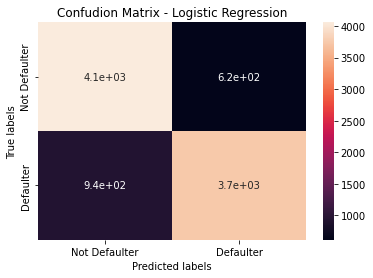

In [64]:
#get the confusion matrix
labels = ['Not Defaulter', 'Defaulter']
cm_logi = confusion_matrix(y_test, y_pred_logi)
print(cm_logi)

#plot confusion matrix
ax = plt.subplot()
sns.heatmap(cm_logi, annot=True, ax = ax)

#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confudion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Decision Tree Classification

In [65]:
#importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [66]:
#fitting data into Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [67]:
#class prediction of y
y_pred_dtc = dtc.predict(X_test)
y_train_pred_dtc = dtc.predict(X_train)

In [68]:
#getting all scores for Decision Tree Classifier
train_accuracy_dtc = round(accuracy_score(y_train_pred_dtc, y_train), 3)
accuracy_dtc = round(accuracy_score(y_pred_dtc, y_test), 3)
precision_score_dtc = round(precision_score(y_pred_dtc, y_test), 3)
recall_score_dtc = round(recall_score(y_pred_dtc, y_test), 3)
f1_score_dtc = round(roc_auc_score(y_pred_dtc, y_test), 3)
roc_score_dtc = round(roc_auc_score(y_pred_dtc, y_test), 3)

print("The accuracy on train data is ", train_accuracy_dtc)
print("The accuracy on test data is ", accuracy_dtc)
print("The precision on test data is ", precision_score_dtc)
print("The recall on test data is ", f1_score_dtc)
print("The roc_score on test data is ", roc_score_dtc)

The accuracy on train data is  1.0
The accuracy on test data is  0.793
The precision on test data is  0.814
The recall on test data is  0.794
The roc_score on test data is  0.794


[[3610 1063]
 [ 869 3804]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

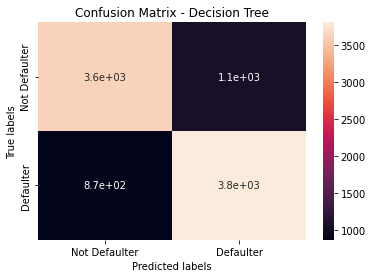

In [70]:
#Get the confusion matrix for decision tree classifier
labels = ['Not Defaulter', 'Defaulter']
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
print(cm_dtc)

#plot confusion matrix
ax = plt.subplot()
sns.heatmap(cm_dtc, annot = True, ax=ax)

#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Random Forest Classification

In [71]:
#importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [72]:
#fitting data into Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [73]:
#class prediction of y
y_pred_rfc = rfc.predict(X_test)
y_train_pred_rfc = rfc.predict(X_train)

In [75]:
#getting all scores for Random Forest Classifier
train_accuracy_rfc = round(accuracy_score(y_train_pred_rfc, y_train), 3)
accuracy_rfc = round(accuracy_score(y_pred_rfc, y_test), 3)
precision_score_rfc = round(precision_score(y_pred_rfc, y_test), 3)
recall_score_rfc = round(recall_score(y_pred_rfc, y_test), 3)
f1_score_rfc = round(f1_score(y_pred_rfc, y_test), 3)
roc_score_rfc = round(roc_auc_score(y_pred_rfc, y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc)
print("The accuracy on test data is ", accuracy_rfc)
print("The precision on test data is ", precision_score_rfc)
print("The recall on test data is ", recall_score_rfc)
print("The f1 on test data is ", f1_score_rfc)
print("The roc_score on test data is ", roc_score_rfc)

The accuracy on train data is  0.999
The accuracy on test data is  0.866
The precision on test data is  0.826
The recall on test data is  0.899
The f1 on test data is  0.861
The roc_score on test data is  0.869


[[4239  814]
 [ 434 3859]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

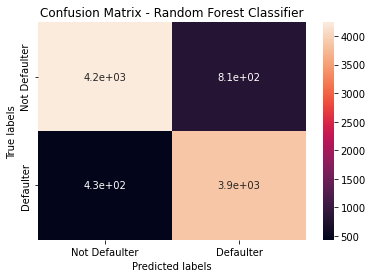

In [77]:
#Get the confusion matrix for Random Forest Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_rfc = confusion_matrix(y_pred_rfc, y_test)
print(cm_rfc)

#plot confusion matrix
ax = plt.subplot()
sns.heatmap(cm_rfc, annot=True, ax=ax)

#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Random Forest Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Support Vector Machine

In [78]:
#importing support vector classifier
from sklearn.svm import SVC

In [79]:
#fitting data into support c=vector classifier
svm=SVC(probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

In [80]:
#class prediction of y
y_pred_svm = svm.predict(X_test)
y_train_pred_svm = svm.predict(X_train)

In [81]:
#getting al scores for support vector classifier
train_accuracy_svm = round(accuracy_score(y_train_pred_svm, y_train), 3)
accuracy_svm = round(accuracy_score(y_pred_svm, y_test), 3)
precision_score_svm = round(precision_score(y_pred_svm, y_test), 3)
recall_score_svm = round(recall_score(y_pred_svm, y_test), 3)
f1_score_svm = round(f1_score(y_pred_svm, y_test), 3)
roc_score_svm = round(roc_auc_score(y_pred_svm, y_test), 3)

print("The accuracy on train is ", train_accuracy_svm)
print("The accuracy on test data is ", accuracy_svm)
print("The precision on test data is ", precision_score_svm)
print("The recall on test data is ", recall_score_svm)
print("The f1 on test data is ", f1_score_svm)
print("The roc_score on test data is ", roc_score_svm)

The accuracy on train is  0.847
The accuracy on test data is  0.841
The precision on test data is  0.769
The recall on test data is  0.898
The f1 on test data is  0.829
The roc_score on test data is  0.848


[[4267 1081]
 [ 406 3592]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

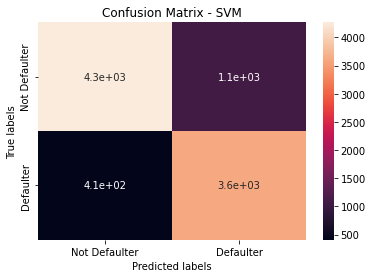

In [82]:
#get the confusion matrix for support vector classifier
labels = ['Not Defaulter', 'Defaulter']
cm_svm = confusion_matrix(y_pred_svm, y_test)
print(cm_svm)

#plot confusion matrix
ax = plt.subplot()
sns.heatmap(cm_svm, annot=True, ax=ax)

#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - SVM')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)